
<h1 align=center style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سری چهارم تمارین عملی درس داده کاوی
</font>
</h1>
<h3 align=center style="line-height:100%;font-family:vazir;color:#0099cc">
استاد درس: دکتر مریم امیر مزلقانی
</h3>
<h5 align=center style="font-size: 20px;line-height:100%;font-family:vazir;color:#0099cc">
طراح تمرین عملی: محمد چوپان  
    </h5>
<p align=center style="font-size: 16;line-height:100%;font-family:vazir;color:#0099cc">
    <a href="mailto:Aut.DataMining.Fall@gmail.com">Aut.DataMining.Fall@gmail.com</a>
</p>


<div dir="rtl">
    
<p dir=rtl style="font-size: 16;line-height:100%;font-family:vazir;color:red;direction:rtl">
لطفا خواسته های تمرین را در بخش خودش انجام دهید.
</p>
</div>

# HW4

## Imports 

In [2]:
## TODO
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این قسمت دیتاست کشور ها را با استفاده از کتابخانه pandas بخوانید. 
</font>
</p>
</div>

In [27]:
## TODO
country_df = pd.read_csv("Country-data.csv")
country_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## Feature engineering

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت شما باید با استفاده از رسم نمودار های مختلف همانند نمودار جعبه ای و یا نقشه گرمایی داده ها را تحلیل کنید.
حداقل 5 نمودار مختلف را رسم کنید.
</font>
</p>
</div>

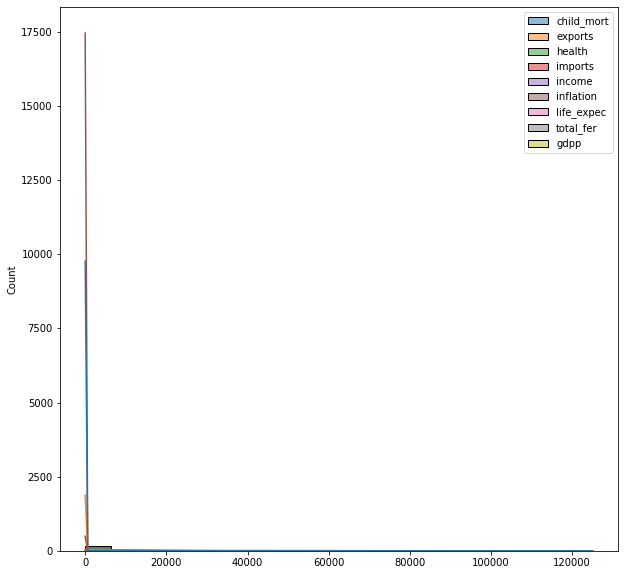

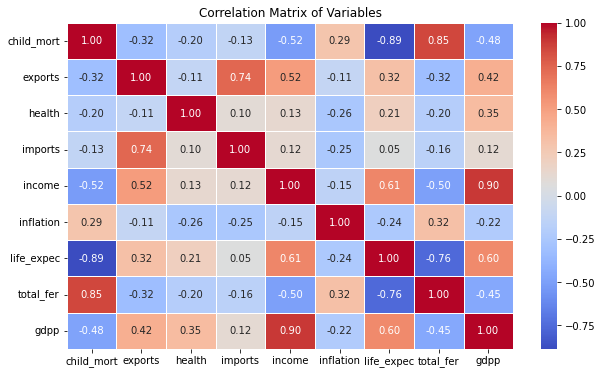

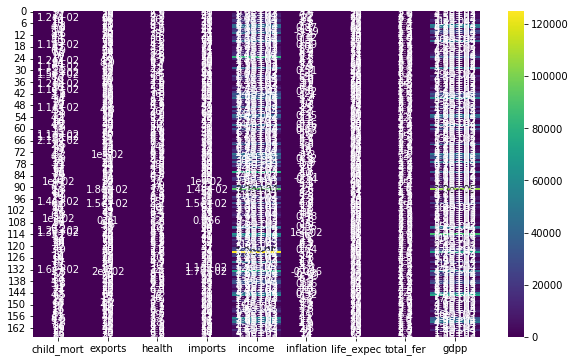

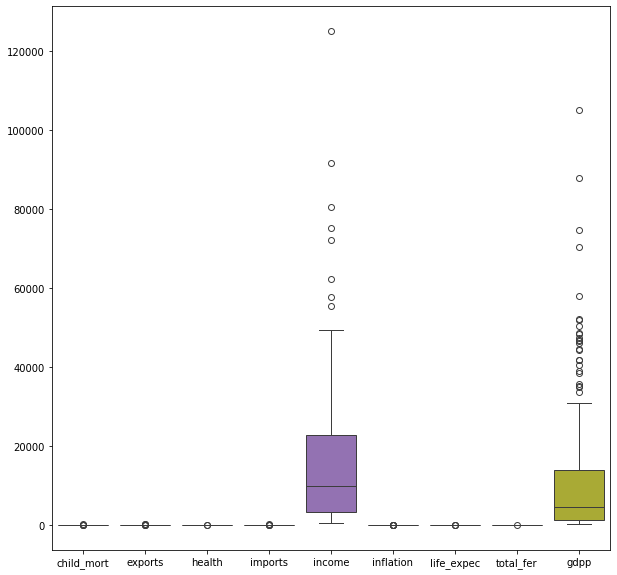

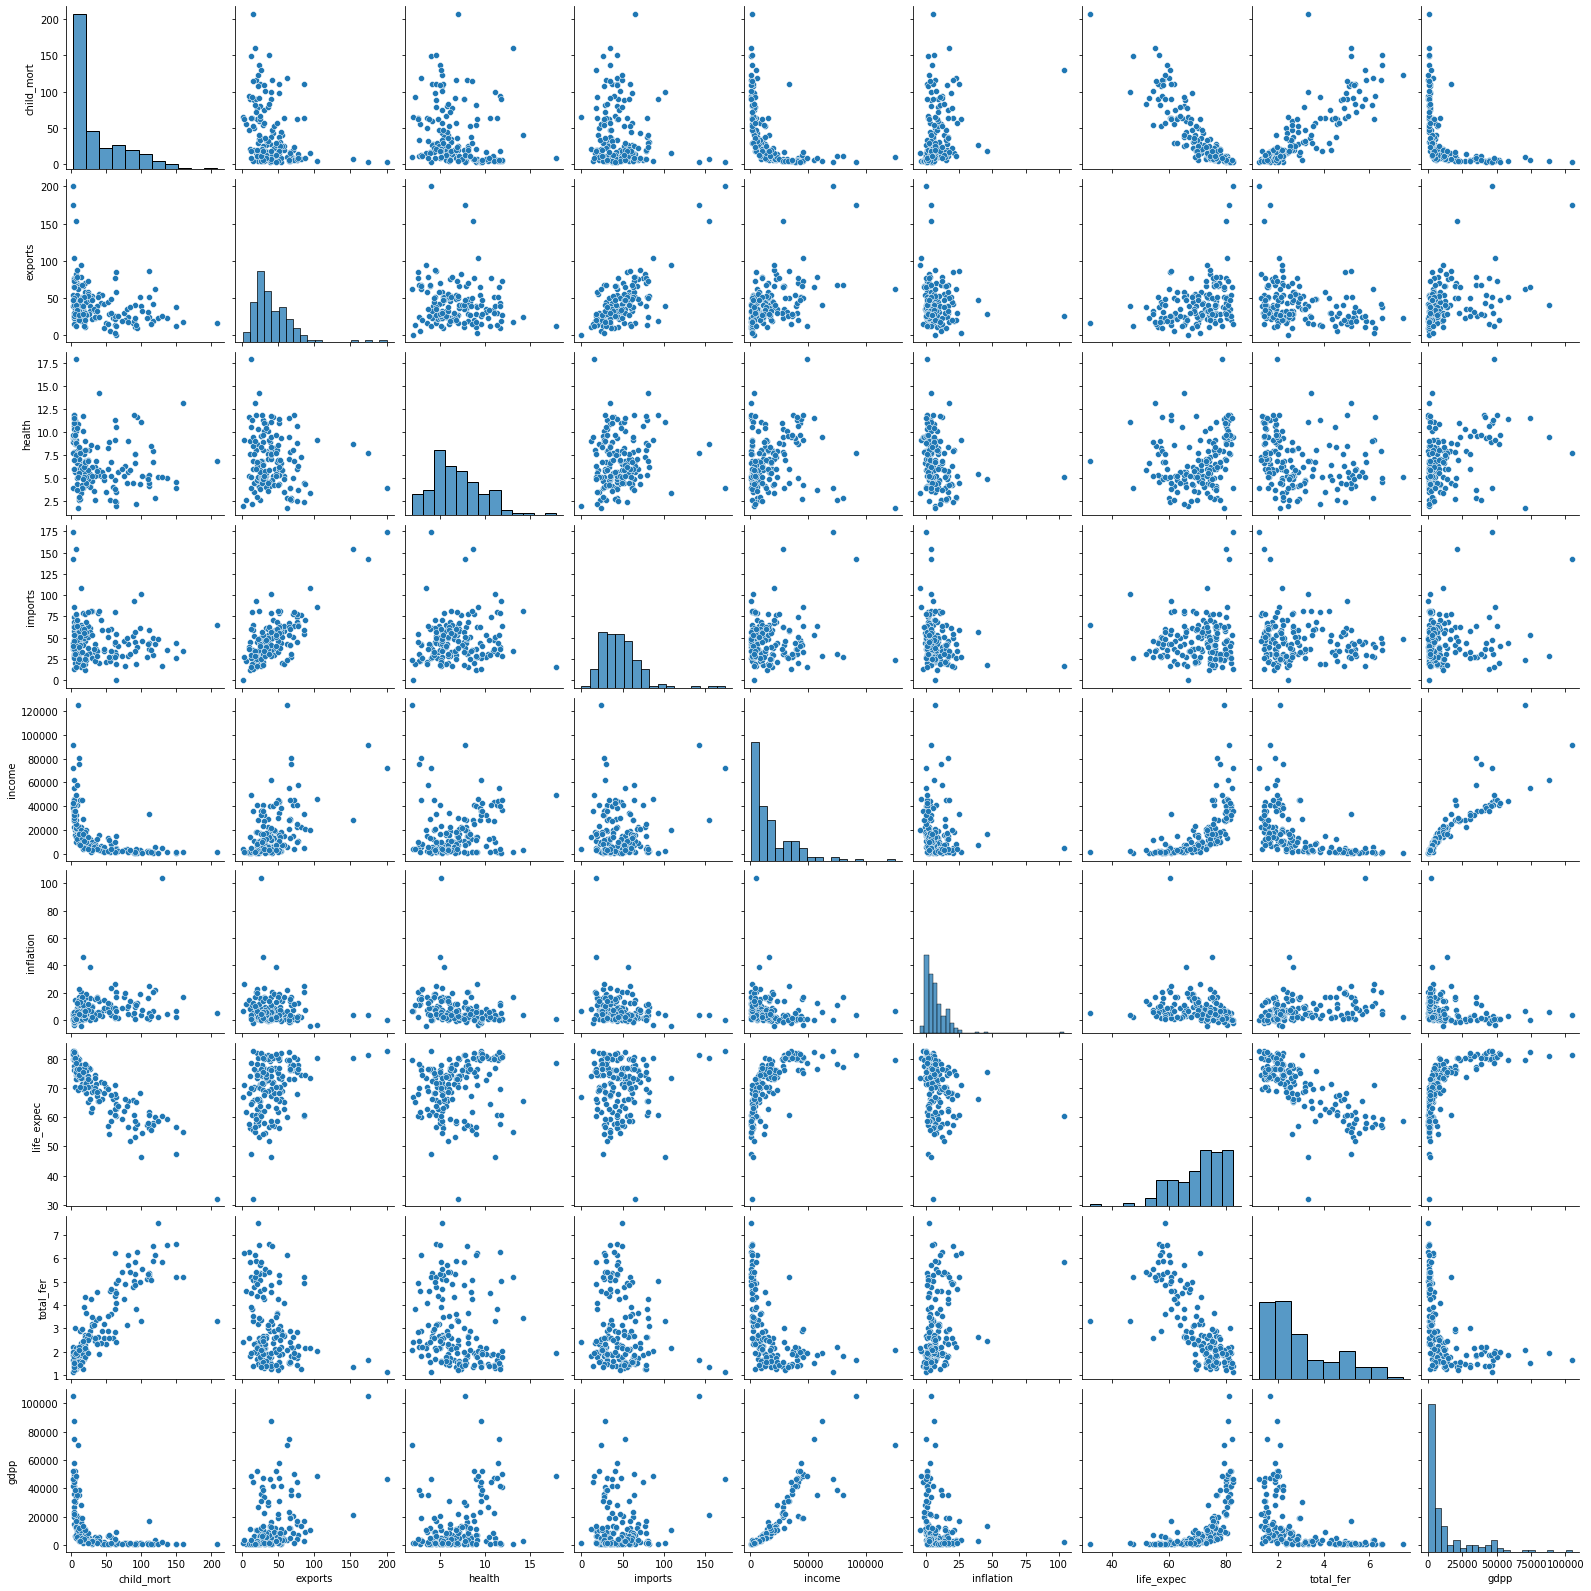

In [17]:
# To be completed
plt.figure(figsize=(10, 10))
sns.histplot(data=country_df, bins=20, kde=True)
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap((country_df.drop(columns=['country'])).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Variables')
plt.show() 

plt.figure(figsize=(10, 6))
sns.heatmap(data=country_df.drop(columns=['country']), annot=True, cmap='viridis')
plt.show()


plt.figure(figsize=(10, 10))
sns.boxplot(data=country_df[['child_mort', 'exports' , 'health' ,'imports' , 'income','inflation','life_expec','total_fer','gdpp']])
plt.show()

sns.pairplot(country_df)
plt.show()

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت داده ها را با پنج نمودار مختلف کشیدیم و مشاهده میشه که دو ويژگی درامد و gdpp بسیار شبیه بهم هستندو همچنین اسکل این دو بسیار بزرگ تر از بقیه ویژگی هاست
</font>
</p>
</div> 

### PCA

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
داده های خود را با استفاده از الگوریتم PCA به 2 بعد کاهش دهید.دقت کنید که به داده های اصلی نیاز داریم. پس حتما آن ها را ذخیره کنید.
</font>
</p>
</div>

In [28]:
## TODO
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(country_df[['child_mort', 'exports' , 'health' ,'imports' , 'income','inflation','life_expec','total_fer','gdpp']])

pca_df = pd.DataFrame(data=data_pca, columns=['feature1', 'feature2'])
pca_df['country'] = country_df['child_mort']
pca_df.to_csv('pca_result.csv', index=False)

## Clustering

### Similarity

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> در این مرحله نیاز است که ماتریس شباهت دادگان را به دست آورید.برای هر یک از داده ها برداری از ویژگی هایش را در نظر گرفته  و ماتریس شباهت رابرای کل  دیتاست به دست آورید.برای معیار شباهت نیز یک بار از فاصله اقلیدسی و یک بار از شباهت کوسینوسی کمک بگیرید.
این کار را هم برای داده های کاهش داده شده و هم برای داده های اصلی انجام دهید.
</font>
</p>
</div> 

In [33]:
## TODO
import numpy as np
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

def euclidean_distance_matrix(data):
    num_samples = len(data)
    similarity_matrix = np.zeros((num_samples, num_samples))

    for i in range(num_samples):
        for j in range(num_samples):
            similarity_matrix[i, j] = euclidean_distance(data[i], data[j])

    return similarity_matrix


def cosine_similarity(x1, x2):
    return np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))

def cosine_similarity_matrix(data):
    num_samples = len(data)
    similarity_matrix = np.zeros((num_samples, num_samples))

    for i in range(num_samples):
        for j in range(num_samples):
            similarity_matrix[i, j] = cosine_similarity(data[i], data[j])

    return similarity_matrix

euclidean_distance_matrix_country_df = euclidean_distance_matrix(country_df.drop(columns=['country']).to_numpy())
cosine_similarity_matrix_country_df = cosine_similarity_matrix(country_df.drop(columns=['country']).to_numpy())

euclidean_distance_matrix_pca = euclidean_distance_matrix(pca_df.drop(columns=['country']).to_numpy())
cosine_similarity_matrix_pca = cosine_similarity_matrix(pca_df.drop(columns=['country']).to_numpy())



### Kmeans

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> بعد از پیاده سازی ماتریش شباهت باید در این مرحله الگوریتم Kmeans را پیاده سازی کنید.دقت کنید استفاده از 
    .
کتابخانه های  آماده مجاز نیست. همچنین مراکز اولیه باید به صورت تصادفی انتخاب شود و تعداد خوشه ها را نیز به صورت بهینه انتتخاب کنید
الگوریتم را تا  زمانی ادامه دهید که به دقت مناسبی برسد.
دقت کنید مجدد خوشه بندی را برای هر دو داده کاهش داده شده و اصلی باید انجام دهید.
</font>
</p>
</div> 

In [55]:
## TODO
import numpy as np

def kmeans(data , n_clusters):
    max_iters=200
    centroids = data[np.random.choice(data.shape[0], n_clusters, replace=False)]
    
    for _ in range(max_iters):
        clusters = [[] for _ in range(n_clusters)]
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            closest_cluster = np.argmin(distances)
            clusters[closest_cluster].append(point)
        
        new_centroids = np.zeros((n_clusters, data.shape[1]))
        for i in range(n_clusters):
            new_centroids[i] = np.mean(clusters[i], axis=0)

        
        if np.all(new_centroids == centroids):
            break
        centroids = new_centroids

    
    labels = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        closest_cluster = np.argmin(distances)
        labels.append(closest_cluster)
    
    return np.array(labels) , centroids

country_df_labels_3 ,country_df_labels_3_centroid = kmeans(country_df.iloc[:, 1:].values,3)

pca_df_labels_3 , pca_df_labels_3_centroid= kmeans(pca_df.iloc[:, 1:].values,3)

country_df_labels_4 , country_df_labels_4_centroid = kmeans(country_df.iloc[:, 1:].values,4)

pca_df_labels_4 , pca_df_labels_4_centroid= kmeans(pca_df.iloc[:, 1:].values,4)



### Results

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> 
در این مرحله نیاز است که نموداری بر اساس خوشه های خود همچنین دقت الگوریتم خود را به صورت نمودار و عددی نشان دهید.

</font>
</p>
</div> 

In [56]:
## TODO
def calculate_sse(data, labels, centroids):
    sse = 0
    for i, centroid in enumerate(centroids):
        cluster_points = data[labels == i]
        sse += np.sum((cluster_points - centroid) ** 2)
    return sse

sse_3_country_df = calculate_sse(country_df.iloc[:, 1:].values, country_df_labels_3, country_df_labels_3_centroid)
print("SSE for 3 clusters in country dataset:", sse_3_country_df)

sse_4_country_df = calculate_sse(country_df.iloc[:, 1:].values, country_df_labels_4, country_df_labels_4_centroid)
print("SSE for 4 clusters in country dataset:", sse_4_country_df)

sse_3_pca_df = calculate_sse(pca_df.iloc[:, 1:].values, pca_df_labels_3, pca_df_labels_3_centroid)
print("SSE for 3 clusters in PCA dataset:", sse_3_pca_df)

sse_4_pca_df = calculate_sse(pca_df.iloc[:, 1:].values, pca_df_labels_4, pca_df_labels_4_centroid)
print("SSE for 4 clusters in PCA dataset:", sse_4_pca_df)


SSE for 3 clusters in country dataset: 24453781336.3549
SSE for 4 clusters in country dataset: 14891567194.786396
SSE for 3 clusters in PCA dataset: 1636821823.9925442
SSE for 4 clusters in PCA dataset: 1116610780.3308592


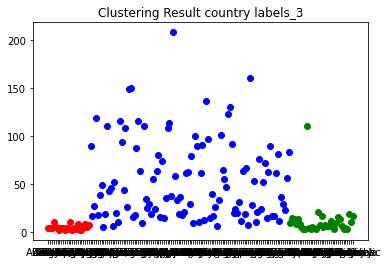

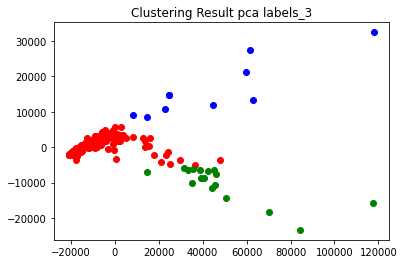

In [63]:
import matplotlib.pyplot as plt

x = [[] for _ in range(3)]
y = [[] for _ in range(3)]

for j in range(len(country_df)):
    if (country_df_labels_3[j] == 0):
        x[0].append(country_df.iloc[j, 0])
        y[0].append(country_df.iloc[j, 1])
    elif (country_df_labels_3[j] == 1):
        x[1].append(country_df.iloc[j, 0])
        y[1].append(country_df.iloc[j, 1])
    elif (country_df_labels_3[j] == 2):
        x[2].append(country_df.iloc[j, 0])
        y[2].append(country_df.iloc[j, 1])

plt.scatter(x[0], y[0], c='red')
plt.scatter(x[1], y[1], c='blue')
plt.scatter(x[2], y[2], c='green')

plt.title('Clustering Result country labels_3')
plt.show()

x = [[] for _ in range(3)]
y = [[] for _ in range(3)]

for j in range(len(pca_df)):
    if (pca_df_labels_3[j] == 0):
        x[0].append(pca_df.iloc[j, 0])
        y[0].append(pca_df.iloc[j, 1])
    elif (pca_df_labels_3[j] == 1):
        x[1].append(pca_df.iloc[j, 0])
        y[1].append(pca_df.iloc[j, 1])
    elif (pca_df_labels_3[j] == 2):
        x[2].append(pca_df.iloc[j, 0])
        y[2].append(pca_df.iloc[j, 1])

plt.scatter(x[0], y[0], c='red')
plt.scatter(x[1], y[1], c='blue')
plt.scatter(x[2], y[2], c='green')

plt.title('Clustering Result pca labels_3')
plt.show()


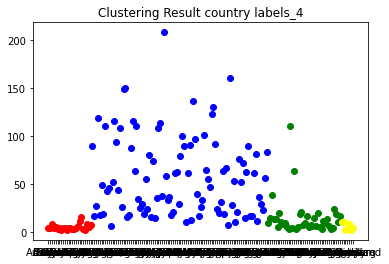

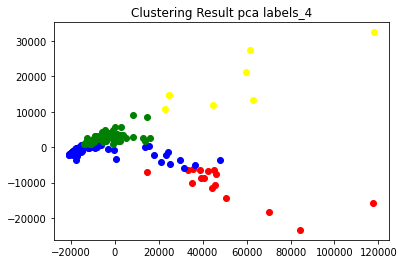

In [64]:
import matplotlib.pyplot as plt

x = [[] for _ in range(4)]
y = [[] for _ in range(4)]

for j in range(len(country_df)):
    if (country_df_labels_4[j] == 0):
        x[0].append(country_df.iloc[j, 0])
        y[0].append(country_df.iloc[j, 1])
    elif (country_df_labels_4[j] == 1):
        x[1].append(country_df.iloc[j, 0])
        y[1].append(country_df.iloc[j, 1])
    elif (country_df_labels_4[j] == 2):
        x[2].append(country_df.iloc[j, 0])
        y[2].append(country_df.iloc[j, 1])
    elif (country_df_labels_4[j] == 3):
        x[3].append(country_df.iloc[j, 0])
        y[3].append(country_df.iloc[j, 1])

plt.scatter(x[0], y[0], c='red')
plt.scatter(x[1], y[1], c='blue')
plt.scatter(x[2], y[2], c='green')
plt.scatter(x[3], y[3], c='yellow')
plt.title('Clustering Result country labels_4')
plt.show()

x = [[] for _ in range(4)]
y = [[] for _ in range(4)]

for j in range(len(pca_df)):
    if (pca_df_labels_4[j] == 0):
        x[0].append(pca_df.iloc[j, 0])
        y[0].append(pca_df.iloc[j, 1])
    elif (pca_df_labels_4[j] == 1):
        x[1].append(pca_df.iloc[j, 0])
        y[1].append(pca_df.iloc[j, 1])
    elif (pca_df_labels_4[j] == 2):
        x[2].append(pca_df.iloc[j, 0])
        y[2].append(pca_df.iloc[j, 1])
    elif (pca_df_labels_4[j] == 3):
        x[3].append(pca_df.iloc[j, 0])
        y[3].append(pca_df.iloc[j, 1])

plt.scatter(x[0], y[0], c='red')
plt.scatter(x[1], y[1], c='blue')
plt.scatter(x[2], y[2], c='green')
plt.scatter(x[3], y[3], c='yellow')
plt.title('Clustering Result pca labels_4')
plt.show()

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> نتایج به دست آمده بالا را با یکدیگر مقایسه کرده و نتیجه را توجیه کنید.
</font>
</p>
</div> 

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>  
 ما برای دوتا دیتا ستمون روش kmeans  رو اجرا کردیم. یکبار با فرض سه خوشه متفاوت و باردیگر با چهار خوشه متفاوت.همچنین برای محاسبه دقت از معیار sse  استفاده کردیم . این معیار برای حالتی که سه خوشه در نظر گرفتیم کمتر به دست امده است تا حالتی که چهار خوشه در نظر بگیریم . پس می توان گفت دقت سه خوشه مناسب تر است .از روی شکل های رسم شده برای خوشه ها هم میتوان گفت که حالت سه خوشه مناسب تر تونسته است داده ها را دسته بندی کنند . در حالت داده های کشور میبینیم که دوتا خوشه زرد رنگ و سبز رنگ بسیار نزدیک بهم و شبیه بهم هستند و نباید جدا شوند.
</font>
</p>
</div> 

### DBSCAN

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> 
الگوریتم DBSCAN را بر هر دو داده کاهش داده شده و اصلی پساده سازی کنید.
    مجددا نمی توانید در اینجا از کتابخانه های آماده استفاده کنید.
</font>
</p>
</div>

In [78]:
## TODO
import numpy as np

def dbscan(data, epsilon, min_pts):
    cluster_labels = [0] * len(data)
    current_cluster_label = 0

    for i in range(len(data)):
        if cluster_labels[i] != 0:
            continue

        neighbors = []
        for index, point in enumerate(data):
            if euclidean_distance(data[i], point) <= epsilon:
                neighbors.append(index)

        if len(neighbors) < min_pts:
            cluster_labels[i] = -1  
        else:
            current_cluster_label += 1
            cluster_labels[i] = current_cluster_label
            for j in range(len(neighbors)):
                neighbor_index = neighbors[j]
                if cluster_labels[neighbor_index] == -1:
                    cluster_labels[neighbor_index] = current_cluster_label
                elif cluster_labels[neighbor_index] == 0:
                    cluster_labels[neighbor_index] = current_cluster_label
                    new_neighbors = []
                    for index, point in enumerate(data):
                        if euclidean_distance(data[neighbor_index], point) <= epsilon:
                            new_neighbors.append(index)
                                    
                    if len(new_neighbors) >= min_pts:
                        neighbors += new_neighbors

    return cluster_labels

cluster_labels = dbscan(country_df.iloc[:, 1:].values, 10, 10)



### Results

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> 
در این مرحله نیاز است که نموداری بر اساس خوشه های خود همچنین دقت الگوریتم خود را به صورت نمودار و عددی نشان دهید.
همچنین مقادری بهینه minpts و eps را گزارش کنید.
</font>
</p>
</div> 

In [18]:
## TODO

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> 
نتایج به دست آمده از مرحله قبل را با این مرحله مقایسه کرده و علت بهتر بودن الگوریتم بهینه را توجیه کنید
</font>
</p>
</div> 

### Similarity

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> در این مرحله نیاز است که ماتریس شباهت دادگان را به دست آورید.برای هر یک از داده ها برداری از ویژگی هایش را در نظر گرفته  و ماتریس شباهت رابرای کل  دیتاست به دست آورید.برای معیار شباهت نیز یک بار از فاصله اقلیدسی و یک بار از شباهت کوسینوسی کمک بگیرید.</font>
</p>
</div> 

In [9]:
## TODO

### Kmeans

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> بعد از پیاده سازی ماتریش شباهت باید در این مرحله الگوریتم Kmeans را پیاده سازی کنید.دقت کنید استفاده از 
    .
کتابخانه های  آماده مجاز نیست. همچنین مراکز اولیه باید به صورت تصادفی انتخاب شود و تعداد خوشه ها را نیز به صورت بهینه انتتخاب کنید
الگوریتم را تا  زمانی ادامه دهید که به دقت مناسبی برسد.
</font>
</p>
</div> 

In [10]:
## TODO

### Results

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> 
در این مرحله نیاز است که نموداری بر اساس خوشه های خود همچنین دقت الگوریتم خود را به صورت نمودار و عددی نشان دهید.

</font>
</p>
</div> 

In [11]:
## TODO

## Association rules

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> 
در این مرحله باید هر دو دیتا ست داده شده به شما را خوانده و سپس برای محموعه داده کوچکتر آستانه پشتیبانی و آستانه اطمینان را به صورت ورودی از کاربر گرفته و سپس تمام قوانین انجمنی معتبر را برای آن ها به دست آورید.
    برای مجموعه داده های بزرگتر نیز مجدد آستانه پشتنیبانی و اطمینان را دریافت کرده و 3 کالایی که بیشترین خرید را با هم داشته اند به دست آورید.
</font>
</p>
</div> 

In [13]:
## TODO